# Ames Housing Prices Prediction 

## Imports

In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import chi2, SelectKBest,f_regression,f_classif
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing_train.csv')
train_columns = data.columns
shape = data.shape
print(f'Dataset has {shape[0]} rows and {shape[1]} columns')
data.describe()

Dataset has 1460 rows and 81 columns


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

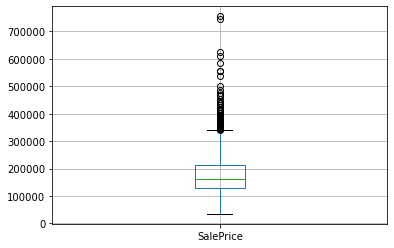

In [4]:
data.boxplot('SalePrice')

Looking at the boxplot to see the range of the housing prices, there are a significant number of houses that are well above the IQ range. It may be useful to closely look at these houses to see what features really impacted the price.

## Feature Engineering & Data Cleaning

First we want to create a copy of the dataframe to enact changes. This is so we always have the original as a reference. 

In [5]:
houses = data.copy()
#Separating the target variable and dropping it from input feature space 
sale_price = houses['SalePrice'].copy()
houses.drop('SalePrice',axis=1,inplace=True)

First, having separate features for number of full and half baths is a bit of an overkill, we can just sum these up into total number of bathrooms for both the basement and main property. 

In [6]:
#First for main house
houses['Bath'] = houses['FullBath'] + 0.5*houses['HalfBath']
#Next for Basement baths
houses['BsmtBath']  = houses['BsmtFullBath'] + 0.5*houses['BsmtHalfBath']
houses.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis =1, inplace=True)

Finding the categorical and numeric column names 

In [7]:
#Number of categorical variables
cat_columns = houses.select_dtypes('object').columns


#Numerical variables
num_columns = houses.columns[~houses.columns.isin(cat_columns)]

### Categorical Variables

First thing we want to do is fill nan cells with a string 'None' so data becomes easier to work with  

In [8]:
houses[cat_columns] = houses[cat_columns].fillna('None')

Next I want to see all values of the categorical features and their representation in the dataset

In [9]:
cat_values = pd.DataFrame()
for i in cat_columns:
    temp = houses[i].value_counts(normalize=True).to_frame(name='count').reset_index()
    temp.insert(0,'Variable',i)
    cat_values = pd.concat([cat_values,temp]).reset_index(drop=True)
cat_values.rename(columns = {'index':'value'},inplace=True)
cat_values

,Variable,value,count
0,MSZoning,RL,0.788356
1,MSZoning,RM,0.149315
2,MSZoning,FV,0.044521
3,MSZoning,RH,0.010959
4,MSZoning,C (all),0.006849
...,...,...,...
262,SaleCondition,Partial,0.085616
263,SaleCondition,Abnorml,0.069178
264,SaleCondition,Family,0.013699
265,SaleCondition,Alloca,0.008219


One thing I notice is quite a number of variables describing either condition or quality are expressed using the same string values. Since these concepts have numeric sense and one hot encoding these variables will significantly increase the dimensionality and cause overfitting, we convert them to integers on a 0-5 scale with 0 being None and 5 being excellent. 
     
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor


In [10]:
#To labelencode
lbl = ['BsmtQual','BsmtCond','KitchenQual','HeatingQC','GarageQual','GarageCond',\
       'ExterQual','ExterCond','FireplaceQu']
#Creating a map to replace values
classes = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
houses[lbl] = houses[lbl].replace(classes)

Another thing I notice is: for some variables most of the records are represented by a single value but yet could have numerous unique values. This would contribute significantly to the dimensionality after one hot encoding. So if greater than 85% of all records is represented by a single value for a variable and there is very little variation among the rest, the rest of the unique values are replaced with 'Other'. This would mean these variables would now have only 2 unique values and thus 1 dummy varibale after one hot encoding.

In [11]:
def simp_cat(data_f,var,thres=0.97,drop_first = False):
    """Function to simplify categorical columns using either a threshold or the dominant value"""
    if drop_first == True:
        for i in cut_list:
            temp2 = data_f[i].value_counts()[1:].index
            data_f[i].replace(temp2,'Other',inplace=True)
    else:
        for i in var:
            temp = data_f[i].value_counts(normalize=True).cumsum()
            temp = temp[temp>thres].index
            data_f[i].replace(temp,'Other',inplace=True)
        
cut_list = ['Functional','Condition1','LandContour']
simp_cat(houses,cut_list,drop_first = True)
cut_list2 = ['Foundation','SaleCondition','SaleType','GarageType','LotShape']
simp_cat(houses,cut_list2,drop_first = False)



Lets try and test the importance of some of these categorical variables. I plan to do this by comparing their values to the sale price per square foot. This is to eliminate the effect of what is one of our largest predictor variables: total square feet. If  there is a lot of variation between values, then I deem that variable has a significant effect on the sale price. We write a function to achieve this below.

In [12]:
def test_importance(var):
    """Function to test importance of a variable """
    t = []
    vals = data[var].unique()
    for i in vals:
        temp = data[data[var] == i]
        s = (temp['SalePrice']/temp['GrLivArea']).median()
        t.append([i,s,len(temp)])
    imp_df = pd.DataFrame(t,columns = ['Value','Price','Number'])
    return imp_df 

In [13]:
#test_importance('BsmtFinType1')
test_importance('Functional')

,Value,Price,Number
0,Typ,122.221967,1360
1,Min1,94.842916,31
2,Maj1,77.941693,14
3,Min2,87.208124,34
4,Mod,87.284483,15
5,Maj2,71.330590,5
6,Sev,54.201681,1


There are 26 neighborhoods in the training set which would result in 24 new variables after one hot encoding.To significantly reduce the dimensionality I segment the neighborhoods into upper class, middle class and lower class zones represented by numbers 1-3 which would mean we would have just the single feature resulting from this. We segment based on proximity to the median sale price per square foot (\\$120/sqft). Values that are \\$10/sqft greater than the median are classified upper class while neighborhoods within \\$10  of the median price per sqft are classified middle class and finally neighborhoods < \\$10 /sqft lower than median are lower class.  

In [14]:
neigh_bins = test_importance('Neighborhood')
neigh_bins

,Value,Price,Number
0,CollgCr,134.515817,150
1,Veenker,143.819334,11
2,Crawfor,115.511551,51
3,NoRidge,128.190843,41
4,Mitchel,132.912458,49
5,Somerst,137.352058,86
6,NWAmes,110.948905,73
7,OldTown,92.076302,113
8,BrkSide,100.896673,58
9,Sawyer,120.766654,74


In [15]:
up_class = []; mid_class = []; low_class = []


for index,row in neigh_bins.iterrows():
    if row[1] > 130:
        up_class.append(row[0])
    elif (row[1] > 110) & (row[1] < 130):
        mid_class.append(row[0])
    else:
        low_class.append(row[0])
        
#replacing neighborhoods

bins = {3:up_class,2:mid_class,1:low_class}

#Creating a function because we will have to execute this on the test set
def neigh(data_f,bins):
    for i in bins:
        data_f['Neighborhood'].replace(bins[i],i,inplace=True)

neigh(houses,bins)

In [16]:
mid_class

['Crawfor',
 'NoRidge',
 'NWAmes',
 'Sawyer',
 'NAmes',
 'SawyerW',
 'Gilbert',
 'ClearCr',
 'NPkVill']

There are a few features which describe secondary conditions of a certain characteristic of a house. If there is only a single characteristic, then same  of such 

In [17]:
len(houses.query('Exterior2nd != Exterior1st'))/data.shape[0]

0.14726027397260275

In [18]:
len(houses.query('Condition1 != Condition2'))/data.shape[0]

0.136986301369863

Now I am going to delete some features I dont deem as relevant and provide justifications below

1. 'Utilities' - 100% of all records have the same value for this variable 
2. 'Street' - 99% are paved hence may not relevant
3. 'RoofMatl' - 98% are made of a single material
4. 'Alley' - 93% of houses have no alley
5. 'PoolQC' - There are only 7 houses with a pool hence this may not be an important variable 
6. 'MiscFeature' - 98% of houses have no misc feature, even if they do it likely does not impace sale price as much as the other variables
7. 'LandSlope' - median sale price/sqft of houses with all possible values are essentially very close to the median, there is not much variation
8. 'RoofStyle' - Not much variation in median sale price/sqft for each value
9. 'Fence' - No value is more than 1 std away from the median
10. 'Condition2' - Nearly 99% are normal and 85% of the time the same info is communicated by 'Condition1' thereby rendering it redundant
11. 'Exterior2nd' - 86% of the time, same info is communicated by 'Exterior1st'
12. 'BsmtFinType2' - Not much variation in sale price/sqft


In [19]:
houses.drop(['Street','MiscFeature','RoofMatl','Heating','Electrical','Alley','LandSlope',
              'Condition2','Fence','PoolQC','RoofStyle','Exterior2nd','Utilities','BsmtFinType2'],axis=1,inplace=True)


In [20]:
#Updating the categorical column names
cat_columns = houses.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'CentralAir', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Numerical Variables

In [21]:
#finding the numerical column names
for i in num_columns:   
    houses[i].fillna(houses[i].median(),inplace=True)

I want to check the f-statistic of all the numerical variables to test its importance to the sale price. This will help cut the number of features and overcome the curse of dimensionality 

In [22]:
#importance of numerical variables
feat = SelectKBest(score_func=f_regression, k = 'all')
feat.fit(houses[num_columns],sale_price)
fts = feat.transform(houses[num_columns])
for i in range(len(feat.scores_)):
    print(f'Feature {num_columns[i]}: {feat.scores_[i]}')

Feature Id: 0.7006760624696968
Feature MSSubClass: 10.431466112799349
Feature LotFrontage: 184.02414900789853
Feature LotArea: 109.09035512347629
Feature OverallQual: 2436.770590906362
Feature OverallCond: 8.891622595321026
Feature YearBuilt: 548.6658210637405
Feature YearRemodAdd: 504.7148547249292
Feature MasVnrArea: 419.3284683390782
Feature BsmtFinSF1: 255.92351651428532
Feature BsmtFinSF2: 0.18877952210685292
Feature BsmtUnfSF: 70.30394810638488
Feature TotalBsmtSF: 880.3412823895799
Feature 1stFlrSF: 845.5244877365998
Feature 2ndFlrSF: 165.56115083414537
Feature LowQualFinSF: 0.9565997543714359
Feature GrLivArea: 1470.5850099552902
Feature BedroomAbvGr: 42.4564124125624
Feature KitchenAbvGr: 27.43723404049172
Feature TotRmsAbvGrd: 580.762800819079
Feature Fireplaces: 406.50386609775387
Feature GarageYrBlt: 406.11394850152413
Feature GarageCars: 1013.7056661608061
Feature GarageArea: 926.9512872732658
Feature WoodDeckSF: 171.4946725979383
Feature OpenPorchSF: 161.57739144881893
Fe

Year sold only has a few unique values, it does not seem to have much numeric sense and it may be better represented as a categorical variable but lets see how the year sold impacts the sale price/sqft

In [23]:
test_importance('YrSold')

,Value,Price,Number
0,2008,119.716386,304
1,2007,120.713306,329
2,2006,121.168829,314
3,2009,117.755980,338
4,2010,121.087737,175


You'd think the 2008 housing crises will significantly affect the housing prices but from the cell above, there is virtually no difference between houses sold that year and the overall median sale price

I think garage year built might be redundant if most of the houses had its garage year built same as the year the house was built or remodeled. So I am going to see now the percentage of such homes 

In [24]:
len(houses[(houses['GarageYrBlt'] != houses['YearRemodAdd']) & (houses['GarageYrBlt'] != houses['YearBuilt'])])/data.shape[0]

0.21712328767123287

22% of such values exist which is significant hence I'll opt to keep the feature

'BedroomAbvGr' and 'KitchenAbvGr' have low f-scores, lets investigate this further.

In [25]:
test_importance('BedroomAbvGr')

,Value,Price,Number
0,3,121.841536,804
1,4,101.098901,213
2,1,149.587834,50
3,2,128.325500,358
4,0,160.822671,6
5,5,81.262592,21
6,6,75.930144,7
7,8,58.910162,1


In [26]:
test_importance('KitchenAbvGr')

,Value,Price,Number
0,1,121.470561,1392
1,2,75.930144,65
2,3,63.701369,2
3,0,130.102041,1


Intuitively, the 'BedroomAbvGr' and 'KitchenAbvGr' variables would seem to positively impact the sale price,but from the correlation matrix they are very much poorly correlated to the sale price with low pearson correlation coefficients of 0.16 and -0.13 respectively. The importance dataframes above also show no clear relationship between these variables and sale price. It now seems it is not a great predictor of the sale price hence is dropped.

Screen porches, open porches and 3 season porches have low f scores but are similar in style so we aggregate them into a single feature 'Porch_Style2' 

In [27]:
#summing up porch spaces
houses['Porch_Style2'] = houses['ScreenPorch'] + houses['OpenPorchSF']+ houses['3SsnPorch']

Due to low scores f scores the following variables seem to be unimportant in predicting sale price and are thus dropped below
'BsmtFinSF1': 'BsmtFinSF2','BsmtUnfSF','MiscVal','LowQualFinSF','MoSold','MSSubClass','OverallCond','ScreenPorch','OpenPorchSF',
'3SsnPorch','PoolArea','YrSold','1stFlrSF','2ndFlrSF','Id'

In [28]:
houses.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','MiscVal','LowQualFinSF',
              'MoSold','MSSubClass','OverallCond','ScreenPorch','OpenPorchSF',\
                  '3SsnPorch','PoolArea','YrSold','1stFlrSF','2ndFlrSF','Id','KitchenAbvGr','BedroomAbvGr'],axis=1,inplace=True)

Now lets take a look at the shape 


In [29]:

print(f'Dataset has {houses.shape[0]} rows and {houses.shape[1]} columns')

Dataset has 1460 rows and 47 columns


### One Hot Encoding

In [30]:
encoding = OneHotEncoder(drop='first')
new_vals = encoding.fit_transform(houses[cat_columns]).toarray()
enc_headers = encoding.get_feature_names_out(input_features = cat_columns)

encoded_values = pd.DataFrame(new_vals,columns = enc_headers)
houses_final = pd.concat([houses,encoded_values],axis=1)
houses_final.drop(cat_columns,axis=1,inplace=True)

print(f'Dataset has {houses_final.shape[0]} rows and {houses_final.shape[1]} columns')

Dataset has 1460 rows and 94 columns


## Test Data

In [31]:
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('target.csv')

In [32]:
test2 = test.copy()

#grab all columns

test_columns = test2.columns
print(test_columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

From first glance I can see that the column names in the test data is not same as the training data. We would need to normalize the test column names to the training column names else we would run into an error when trying to predict

In [33]:

#normalizing columns headers to that of training data
column_map = {}
for i,j in zip(train_columns[1:-1],test_columns[2:]):
    if i !=j:
        column_map[j] = i
test2.rename(columns=column_map,inplace=True)
#updating the column names
test_columns = test2.columns

One thing I want to check is if there are any values in categorical columns that are not present in the training set as this would pose a problem when we try to convert to dummy variables.

In [34]:
cat_columns_t = test2.select_dtypes('object').columns

val_remove = {}; ind = []

for i in cat_columns_t:
    train_vars = set(data[i].unique())
    test_vars = set(test2[i].unique())
    diff = test_vars.difference(train_vars)
    if diff:
        val_remove[i] = [diff]
        idx = test2[i][test2[i].isin(diff)].index
        ind.append(idx)
val_remove

{'Neighborhood': [{'Greens', 'GrnHill'}],
 'BsmtCond': [{'Ex'}],
 'Functional': [{'Sal'}],
 'PoolQC': [{'TA'}],
 'SaleType': [{'WD '}]}

In [35]:
test2['SaleType'].replace('WD ','WD',inplace=True)

1. Neighborhood - There are two houses in neighborhoods that are not represented in the training data. It could mean one of two things, either these neighborhoods are undesirable which would explain low sales or these are high-end neighborhoods which most residents cant afford. I would play it safe and classify them as middle class neighborhoods.

2. BsmtCond & PoolQC- This will be taken care of by the numeric rating system adopted in the training data 
3. SaleType - We would have to normalize to training data 
4. Functional - Since there is only one record will be replaced with 'Other'


In [36]:
#updating middle class list 
mid_class = mid_class+['GrnHill','Greens']
#updating the bins
bins[2] = mid_class 

Creating a function to enact all feature changes that were made on the train set.

In [37]:
def transform(test_data):
     #Handling bath
    test_data['Bath'] = test_data['FullBath'] + 0.5*test_data['HalfBath']
    test_data.drop(['FullBath','HalfBath'],axis =1,inplace=True)
    #BSMNT sqft
    test_data['BsmtBath']  = test_data['BsmtFullBath'] + 0.5*test_data['BsmtHalfBath']
    test_data['Porch_Style2'] = test_data['ScreenPorch'] + test_data['OpenPorchSF']+ test_data['3SsnPorch']
    test_data.drop(['BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)
    test_data[lbl] = test_data[lbl].replace(classes)
    cat_column = test_data.select_dtypes('object').columns
    drop_cols = test_data.columns[~test_data.columns.isin(houses.columns)]
    test_data.drop(drop_cols,axis=1,inplace=True)
    cat_column = test_data.select_dtypes('object').columns
    test_data[cat_column] = test_data[cat_column].fillna('None')
    for i in cut_list:
        temp2 = test_data[i].value_counts()[1:].index
        test_data[i].replace(temp2,'Other',inplace=True)
    simp_cat(test_data,cut_list2)
    simp_cat(test_data,['LotShape'],thres=0.95)
    neigh(test_data,bins)
    return test_data

test2 = transform(test2)

In [38]:
#Updating the categorical columns 
cat_columns_t = test2.select_dtypes('object').columns
cat_columns_t

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'CentralAir', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

Encoding the categorical columns

In [40]:
new_test = encoding.transform(test2[cat_columns_t]).toarray()
new_test = pd.DataFrame(new_test,columns = enc_headers)


test2_final = pd.concat([test2.reset_index(drop=True),new_test.reset_index(drop=True)],axis=1)
test2_final.drop(cat_columns,axis=1,inplace=True)

In [41]:
#Updating the numerical columns
num_columns = test2.columns[~test2.columns.isin(cat_columns)]

In [42]:
num_columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'EnclosedPorch', 'Bath', 'BsmtBath', 'Porch_Style2'],
      dtype='object')

Filling the nan values with the median of each feature

In [43]:
for i in num_columns:
    test2_final[i].fillna(test2_final[i].median(),inplace=True)

Checking to see if the column names in the test set is an exact replica of the column names in the train set

In [44]:
houses_final.columns[~houses_final.columns.isin(test2_final.columns)]

Index([], dtype='object')

## Modeling

Trying both gradient boosting and random forest algorithms. I want to create base models on each and then tune hyperparameters on 15% of the data which I have set aside.

In [45]:
#Splitting the data 
X_train,Val_x,y_train,Val_y = train_test_split(houses_final,sale_price/1000,test_size=0.15,random_state=43)

#Setting the base models with max depth of 5 and 100 estimators
rf = RandomForestRegressor(n_estimators=100,max_depth=5,random_state = 25)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
val_pred = rf.predict(Val_x)

gb = GradientBoostingRegressor(n_estimators=150,max_depth=5,random_state = 25)
gb.fit(X_train, y_train)
y_pred2 = gb.predict(X_train)
val_pred2 = gb.predict(Val_x)

In [46]:
#Initial error metrics
err = mean_absolute_percentage_error(y_train,y_pred)
err_val = mean_absolute_percentage_error(val_pred,Val_y)

err2 = mean_absolute_percentage_error(y_train,y_pred2)
err_val2 = mean_absolute_percentage_error(val_pred2,Val_y)

In [47]:
print(f'Random Forest Train Accuracy {(1-err)*100:.3f}%')
print(f'Gradient boosting Train Accuracy {(1-err2)*100:.3f}%')

Random Forest Train Accuracy 89.462%
Gradient boosting Train Accuracy 97.195%


## Hyperparameter Tuning - Random Forest  

In [48]:
#Finding the optimum max depth 
err_md = []
for j in range(1,15):
    rf_test = RandomForestRegressor(n_estimators=100,max_depth=j,random_state = 25)
    rf_test.fit(X_train, y_train)
    err_md.append(mean_absolute_percentage_error(Val_y,rf_test.predict(Val_x)))

Text(0.5, 1.0, 'Max Depth Optimization')

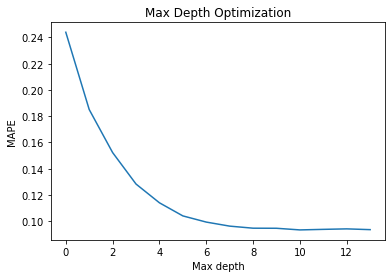

In [49]:
#Max depth Optimization 
fig,ax = plt.subplots(1,1)
ax.plot(err_md)
ax.set_xlabel('Max depth')
ax.set_ylabel('MAPE') 
ax.set_title('Max Depth Optimization')

Model perfromance plateaus after a max depth of 8. Setting this as the max depth 

In [50]:
#Optimizing the number of Estimators
err_est = []
for t in range(1,150):
    rf_test2 = RandomForestRegressor(n_estimators=t,max_depth=8,random_state = 25)
    rf_test2.fit(X_train, y_train)
    err_est.append(mean_absolute_percentage_error(Val_y,rf_test2.predict(Val_x)))

In [51]:
n_est_rf = err_est.index(min(err_est))+1
print(f'Optimal number of estimators for Random forest is {n_est_rf}')

Optimal number of estimators for Random forest is 28


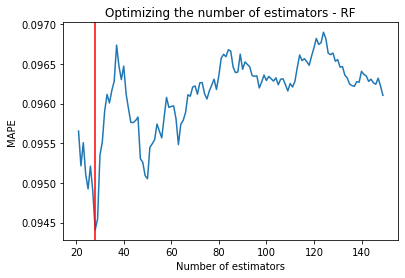

In [52]:
fig1, ax1 = plt.subplots()
ax1.plot(list(range(21,150)),err_est[20:])
ax1.set_xlabel('Number of estimators')
ax1.set_ylabel('MAPE')
ax1.set_title('Optimizing the number of estimators - RF')
ax1.axvline(n_est_rf,color='r')

## Hyperparameter Tuning - Gradient Boosting

In [53]:
#Finding the optimum number of estimators
errs = [mean_absolute_percentage_error(Val_y,yval_pred) for yval_pred in gb.staged_predict(Val_x)]

In [54]:
n_est_gb = errs.index(min(errs))+1
print(f'Optimal number of estimators for gradient boosting is {n_est_gb}')

Optimal number of estimators for gradient boosting is 116


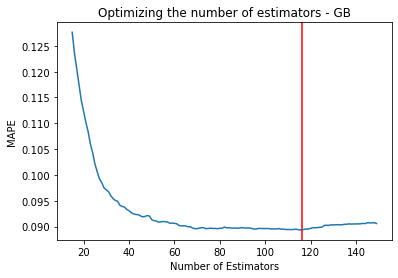

In [55]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(list(range(15,150)),errs[15:])
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('MAPE')
ax2.set_title('Optimizing the number of estimators - GB')
ax2.axvline(n_est_gb,color='r')

## Final Model Prediction & Evaluation

In [56]:
rf_final = RandomForestRegressor(n_estimators=n_est_rf,max_depth=8,random_state = 25)

rf_final.fit(X_train, y_train)
y_pred = rf_final.predict(X_train)
val_pred = rf_final.predict(Val_x)

gb_final = GradientBoostingRegressor(n_estimators=n_est_gb,max_depth=8, random_state = 25)
gb_final.fit(X_train, y_train)
y_pred2 = gb_final.predict(X_train)
val_pred2 = gb_final.predict(Val_x)

In [57]:
test_label_normal = test_labels['SalePrice']/1000

In [58]:
test_pred = rf_final.predict(test2_final)
test_pred2 = gb_final.predict(test2_final)

In [59]:
#Evaluating using error metrics
#RF- Train
err_train_rf = mean_absolute_percentage_error(y_train,y_pred)
err_train_rf_rmse = mean_squared_error(y_train,y_pred,squared=False)
#GB - Train 
err_train_gb = mean_absolute_percentage_error(y_train,y_pred2)
err_train_gb_rmse = mean_squared_error(y_train,y_pred2,squared=False)
#RF- Test
err_test_rf = mean_absolute_percentage_error(test_label_normal,test_pred)
err_test_rf_rmse = mean_squared_error(test_label_normal,test_pred,squared=False)
#GB- Test
err_test2_gb = mean_absolute_percentage_error(test_label_normal,test_pred2)
err_test_gb_rmse = mean_squared_error(test_label_normal,test_pred2,squared=False)

In [60]:
print(f'Random Forest Train Accuracy {(1-err_train_rf)*100:.3f}%')
print(f'Random Forest Train RMSE ${(err_train_rf_rmse*1000):,.3f}')
print(f'Random Forest Test Accuracy {(1-err_test_rf)*100:.3f}%')
print(f'Random Forest Test RMSE ${(err_test_rf_rmse*1000):,.3f}')

Random Forest Train Accuracy 93.459%
Random Forest Train RMSE $15,934.219
Random Forest Test Accuracy 90.187%
Random Forest Test RMSE $21,892.630


In [61]:
print(f'Gradient Boosting Train Accuracy {(1-err_train_gb)*100:.3f}%')
print(f'Gradient Boosting Train RMSE ${(err_train_gb_rmse*1000):,.3f}')
print(f'Gradient Boosting Test Accuracy {(1-err_test2_gb)*100:.3f}%')
print(f'Gradient Boosting Test RMSE ${(err_test_gb_rmse*1000):,.3f}')

Gradient Boosting Train Accuracy 99.549%
Gradient Boosting Train RMSE $924.134
Gradient Boosting Test Accuracy 91.645%
Gradient Boosting Test RMSE $23,494.606


Lets look at the crossplots now

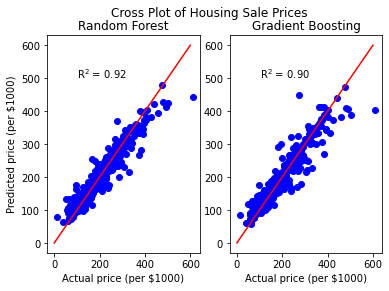

In [62]:
fig4,ax4 = plt.subplots(1,2)
ax4[0].plot(test_label_normal,test_pred,'bo')
ax4[0].plot([0,600],[0,600],'r-')
ax4[0].set_xlabel('Actual price (per $1000)')
ax4[0].set_ylabel('Predicted price (per $1000)')
ax4[0].set_title('Random Forest')
r2_rf = r2_score(test_label_normal,test_pred)
ax4[0].text(100,500,f'R$^{2}$ = {r2_rf:.2f}')
fig4.suptitle('Cross Plot of Housing Sale Prices')
ax4[1].plot(test_label_normal,test_pred2,'bo')
ax4[1].plot([0,600],[0,600],'r-')
ax4[1].set_xlabel('Actual price (per $1000)')
r2_gb = r2_score(test_label_normal,test_pred2)
ax4[1].set_title('Gradient Boosting')
ax4[1].text(100,500,f'R$^{2}$ = {r2_gb:.2f}')
fig.set_size_inches(12,6.5)


Generally, it seems there's good accuracy on predicting house prices barring a few houses that seem way off. That could easily be attributed to all the bias I introduced. An argument could be made to drop the records which had neighborhoods not represented in the training data but I feel one feature shouldnt prevent the house price prediction entirely.